# Машинное обучение, DS-поток
## Задание ML.2

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 20 баллов;
* Задача 3 &mdash; 30 баллов;
* Задача 4 &mdash; 20 баллов;
* Задача 5 &mdash; 150 баллов.

----

In [56]:
# Bot check

# HW_ID: ds_ml2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [57]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from scipy.special import logsumexp
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



import warnings

warnings.filterwarnings("ignore")

sns.set(palette="Set2")

---
### Задача 1.

Во взвешенном методе наименьших квадратов каждому наблюдению задается некоторый известный вес $w_i$. Задача имеет следующий вид: $$\sum\limits_{i=1}^n w_i(y_i - x_i^T\theta)^2 \rightarrow \min\limits_{\theta \in \mathbb{R}}$$

Найдите решение задачи в матричном виде.

\begin{align*}
df(\theta) =& -2 \sum \limits_{i = 1}^n w_i (y_i - x_i^T \theta) \langle x_i, d\theta \rangle \\
=&   \langle -2 \sum \limits_{i = 1}^n w_i (y_i - x_i^T \theta) x_i, d\theta \rangle 
\end{align*}

Откуда 
$$
\nabla f(\theta) = -2 \sum \limits_{i = 1}^n w_i (y_i - x_i^T \theta) x_i
$$

В матричном виде градиент примет вид:
$$
\nabla f(\theta) = -2 X^T (W \circ (Y -X^T\theta))
$$

Здесь $\circ$ обозначает оператор Адамара, т.е. операцию попарного произведения элементов матриц.

Теперь мы можем записать решение задачи используя градиентный спуск. Т.е.

$$
\theta_{k+1} = \theta_k + 2 \eta X^T(W \circ (Y -X^T\theta_k))
$$

---
### Задача 2.

Рассмотрим модель логистической регрессии. Признаки объекта представимы в виде $d$-мерного вектора $x \in \mathbb{R}^d$, класс имеет бернулиевское распределение $Y \sim Bern(\mu_\theta(x))$. Мы делаем следующее предположение о зависимости параметра вероятности от признаков 
$${\mu_\theta(x) = \sigma(x^T\theta)= \cfrac{1}{1 + e^{-x^T\theta}}}.$$

Зададим регуляризацию через минимизацию следующего функционала:

$${F(\theta) = -\log L_{Y}(\theta) + \lambda \|\theta\|_2^2},$$

где ${L_{Y}(\theta)}$ &mdash; функция правдоподобия.

Опишите процесс оптимизации методами GD, SGD и IRLS.

$L_Y(\theta) = \prod \limits^n_{i=1}\mu_\theta(x_i)^{y_i} \cdot (1 - \mu_\theta(x_i))^{1 - y_i} \rightarrow \underset{\theta}{max}$

На лекции вывели:
$$
\nabla \log L_y(\theta) = X^T(Y - S(\theta))
$$

где $S(\theta) = (\sigma(x_1^T\theta) \ ... \ \sigma(x_n^T\theta))^T$

Продифферецируем $\lambda ||\theta||^2_2$:
$$
\nabla (\lambda ||\theta||^2_2) = 2 \lambda \theta
$$

В итоге имеем:
$$
\nabla F(\theta) = -X^T(Y - S(\theta)) + 2 \lambda \theta
$$

GD: $\theta_{k+1} = \theta_k - 2\eta(-X^T(Y - S(\theta_k)) + 2 \lambda \theta_k)$

SGD:$\theta_{k+1} = \theta_k - 2\eta \frac{n}{m}(-X_m^T(Y_m - S(\theta_k)) + 2 \lambda \theta_k)$

Где индекc m обозначает подвыборку из всех элементов X и Y размера m.

На лекции был получен результат:
$$
\nabla^2 log L_Y(\theta) = -X^T V(\theta)X
$$
где $V(\theta) = diag(\sigma(x_1^T\theta) \ ... \ \sigma(x_n^T\theta))$

$$\nabla^2(\lambda ||\theta||^2_2) = 2\lambda I$$

В итоге имеем:
$$
\nabla^2 F(\theta) = X^T V(\theta)X - 2\lambda I
$$

IRLS: $\theta_{k+1} = \theta_k -(X^T V(\theta_k)X - 2\lambda I)^{-1}(-X^T(Y - S(\theta_k)) + 2 \lambda \theta_k)$

---
### Задача 3.

Исследуем логистическую регрессию на простых примерах. С помощью кода ниже сгенерируйте данные, состоящие из одного вещественного признака и бинарного таргета.

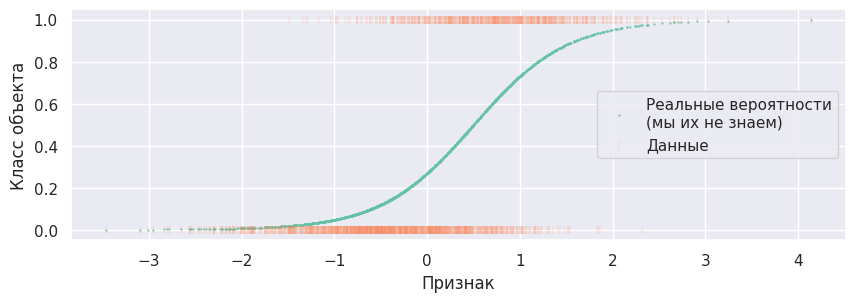

In [58]:
sample_size = 2000

# Признаки
X = np.random.normal(size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(1 - 2 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(
    X, y_mean_true, marker=".", s=1, label="Реальные вероятности\n(мы их не знаем)"
)
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend()

Обучите логистическую регрессию, используя реализацию из sklearn, при этом
* свободный коэффициент должен присутствовать в модели,
* регуляризацию использовать не нужно.

Определим модель и обучим ее:

In [59]:
logistic_model = LogisticRegression(penalty=None, fit_intercept=True)

logistic_model.fit(X, y)

LogisticRegression(penalty=None)

Напечатайте оценку коэффициентов

In [60]:
logistic_model.coef_

array([[2.05637565]])

Ниже объявлена сетка значений признака. По этой сетке постройте
* предсказания классов,
* предсказания вероятностей класса 1.

Визуализируйте эти предсказания. На график стоит нанести также обучающую выборку.

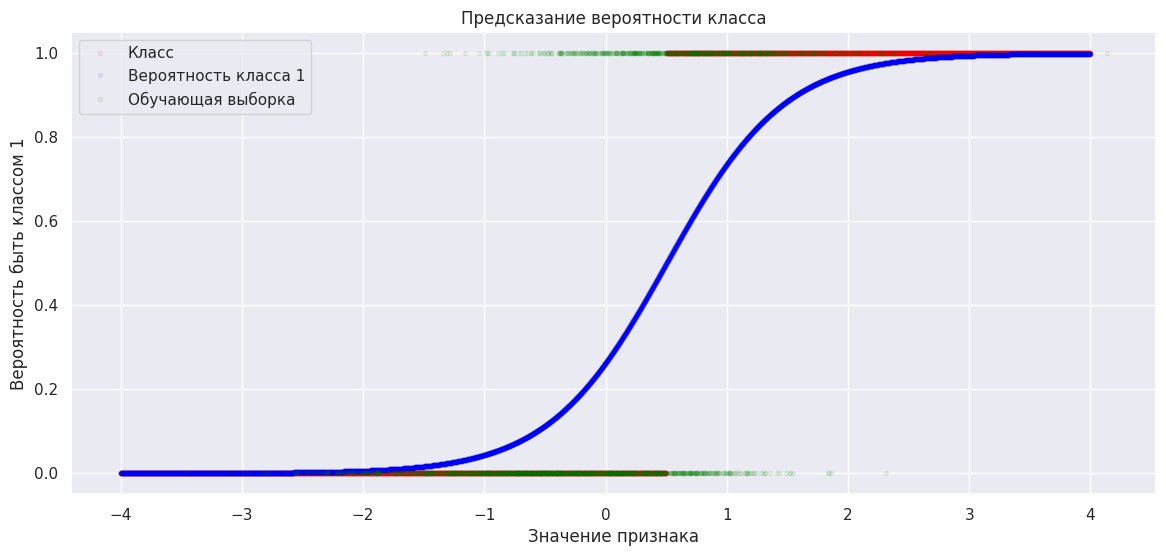

In [61]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))


def show_distribution(X, y, model, X_grid, global_alpha=0.07):
    predictions_of_class = model.predict(X_grid)
    probabilities_of_first_class = model.predict_proba(X_grid)[:, 1]

    plt.figure(figsize=(14, 6))
    plt.plot(
        X_grid,
        predictions_of_class,
        color="red",
        marker=".",
        ls=" ",
        alpha=global_alpha,
        label="Класс",
    )
    plt.plot(
        X_grid,
        probabilities_of_first_class,
        color="blue",
        marker=".",
        ls=" ",
        alpha=global_alpha,
        label="Вероятность класса 1",
    )

    plt.plot(
        X,
        y,
        color="green",
        marker=".",
        ls=" ",
        alpha=global_alpha,
        label="Обучающая выборка",
    )

    plt.xlabel("Значение признака")
    plt.ylabel("Вероятность быть классом 1")
    plt.title("Предсказание вероятности класса")
    plt.legend()
    plt.show()


show_distribution(X, y, logistic_model, X_grid)

Разбейте отрезок $[-4, 4]$ на одинаковые бины длины порядка 0.2 и посчитайте в каждом бине долю объектов класса 1. Полученные значения добавьте на график предсказаний вероятностей и сравните эти графики. Проинтерпретируйте полученные результаты.

*Подсказка:* может помочь `np.digitize` и метод `groupby` для таблиц `pandas`.

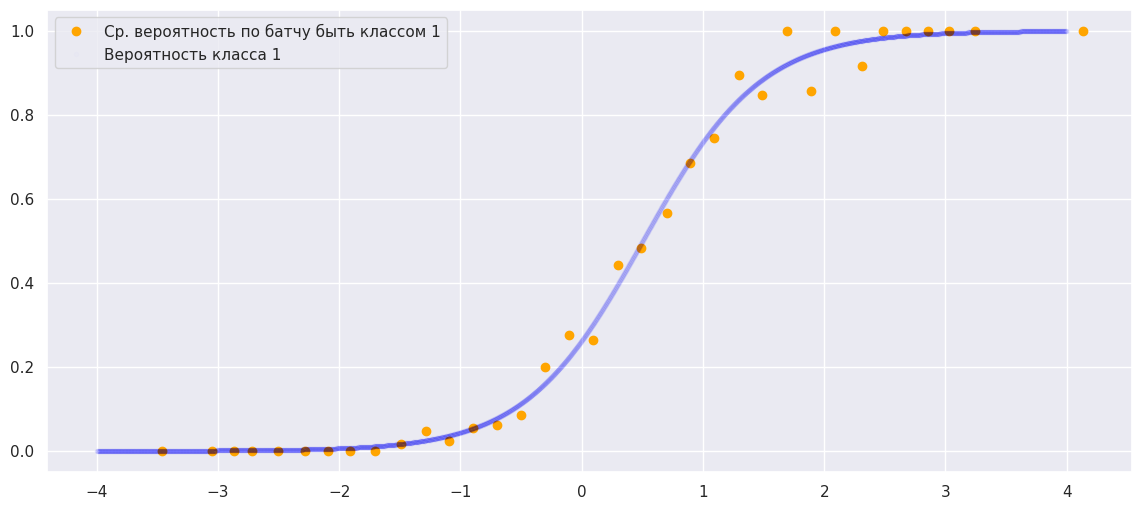

In [62]:
def show_bin_distribution(X, y, model, X_grid, global_alpha=0.07):
    probabilities_of_first_class = model.predict_proba(X_grid)[:, 1]
    bins = np.digitize(X, np.arange(-4, 4.2, 0.2))
    df = pd.DataFrame({"x": X.ravel(), "y": y.ravel(), "bin": bins.ravel()})
    bin_stats = df.groupby("bin").agg({"x": "mean", "y": "mean"})
    bin_stats = bin_stats.rename(
        columns={"x": "center_of_bin", "y": "mean_prob_of_bin"}
    )

    plt.figure(figsize=(14, 6))
    plt.plot(
        bin_stats["center_of_bin"],
        bin_stats["mean_prob_of_bin"],
        marker="o",
        ls=" ",
        color="orange",
        label="Ср. вероятность по батчу быть классом 1",
        alpha=1,
    )

    plt.plot(
        X_grid,
        probabilities_of_first_class,
        color="blue",
        marker=".",
        ls=" ",
        alpha=global_alpha / 10,
        label="Вероятность класса 1",
    )

    plt.legend()
    plt.show()


show_bin_distribution(X, y, logistic_model, X_grid)

Как видим, наша модель повторяет среднее значение внутри бина. Это связано с тем, что данные признаки меняются равномерно, из-за чего прямая граница между классами становится менее различимой, а кривая становится пологой.

Повторите проведенное исследование для следующих данных и сравните результаты.

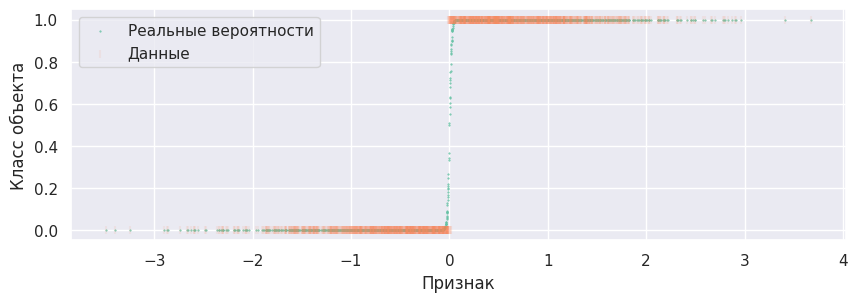

In [63]:
# Признаки
X = np.random.normal(size=(sample_size, 1))

# Таргет
y_mean_true = 1 / (1 + np.exp(-100 * X.ravel()))
y = np.random.binomial(n=1, p=y_mean_true)

plt.figure(figsize=(10, 3))
plt.scatter(X, y_mean_true, marker=".", s=1, label="Реальные вероятности")
plt.scatter(X, y, marker="|", alpha=0.1, label="Данные")
plt.xlabel("Признак")
plt.ylabel("Класс объекта")
plt.legend()

Обучим модель и выведем коэффициенты

In [64]:
logistic_model = LogisticRegression(penalty=None, fit_intercept=True)
logistic_model.fit(X, y)
logistic_model.coef_

array([[122.29779308]])

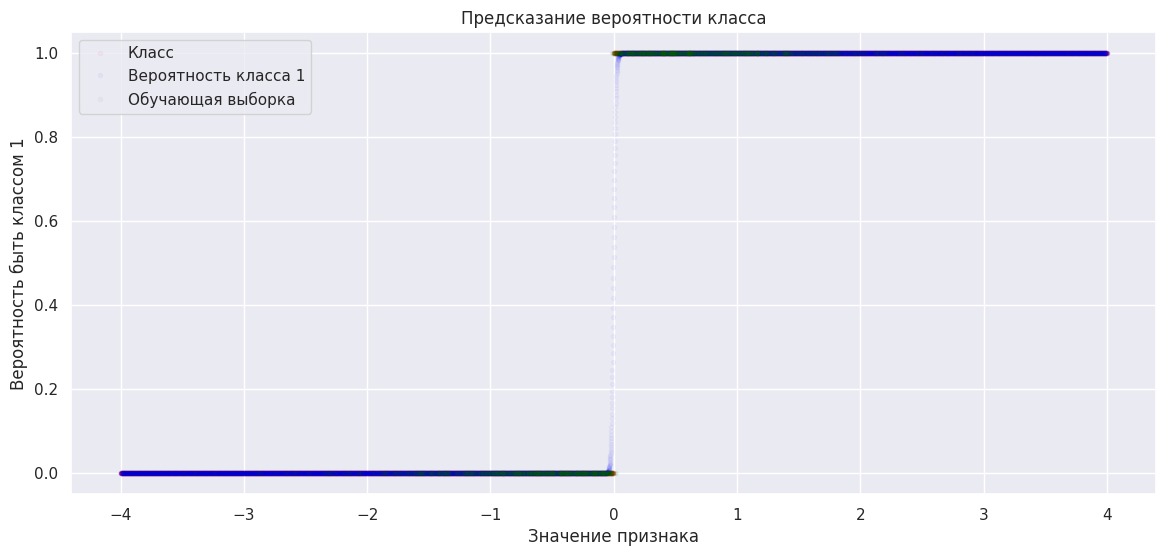

In [65]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
show_distribution(X, y, logistic_model, X_grid, global_alpha=0.03)

Как видим, и вероятность быть классом 1, и само распределение классов, и обучающая выборка буквально перекрывают друг друга. Это не удивительно, "водораздел" между классами очень резкий, а потому определить точную границу достаточно просто.

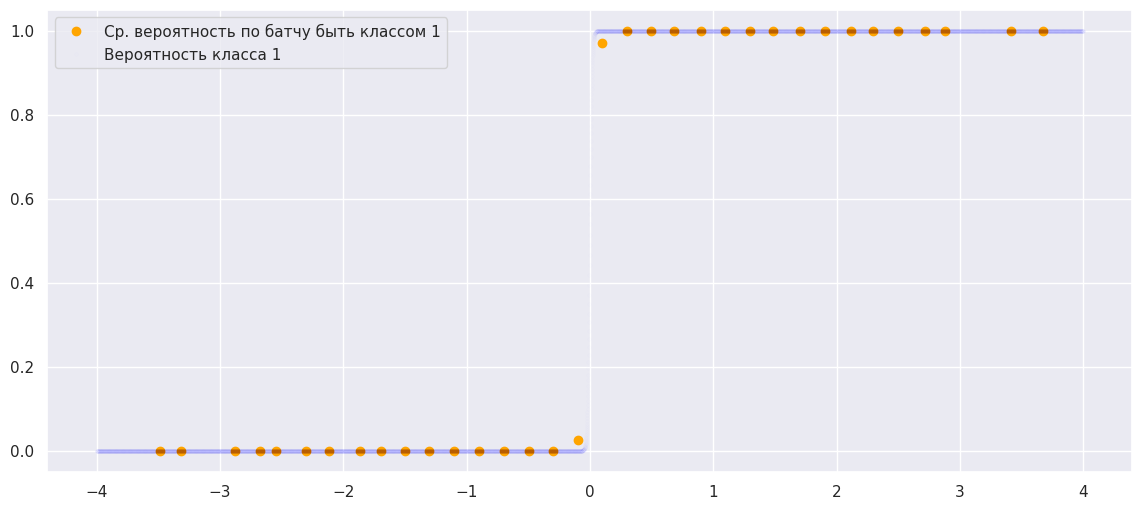

In [66]:
show_bin_distribution(X, y, logistic_model, X_grid, global_alpha=0.03)

По той же причине, что и выше мы наблюдаем разрыва и на данном графике.

Исследуйте, как меняются предсказания для второго датасета при наличии регуляризации.

In [67]:
logistic_model = LogisticRegression(penalty="l2", fit_intercept=True)
logistic_model.fit(X, y)
logistic_model.coef_

array([[10.66204598]])

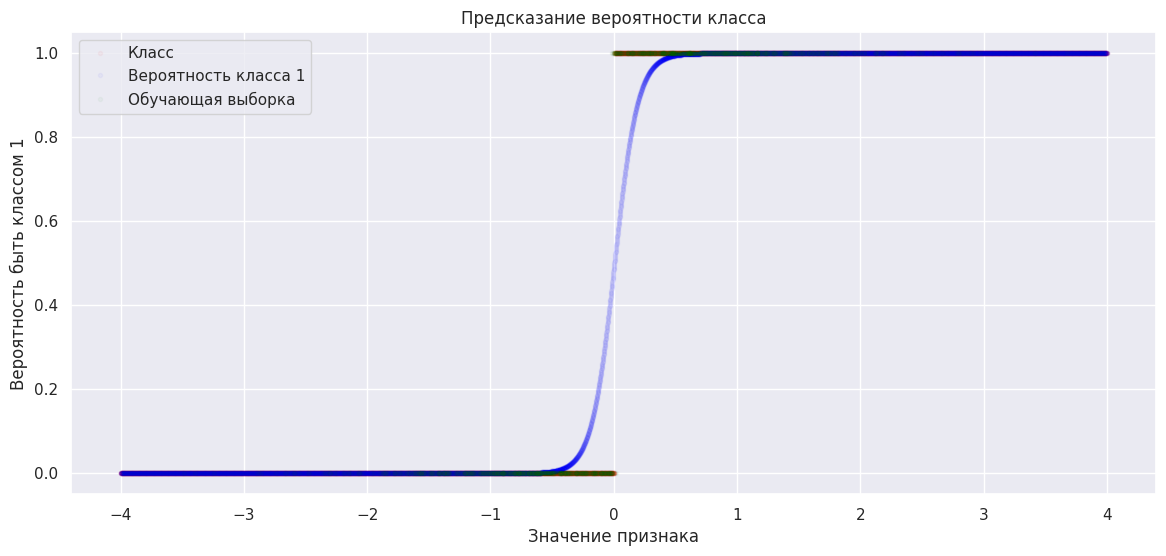

In [68]:
X_grid = np.linspace(-4, 4, 10000).reshape((-1, 1))
show_distribution(X, y, logistic_model, X_grid, global_alpha=0.03)

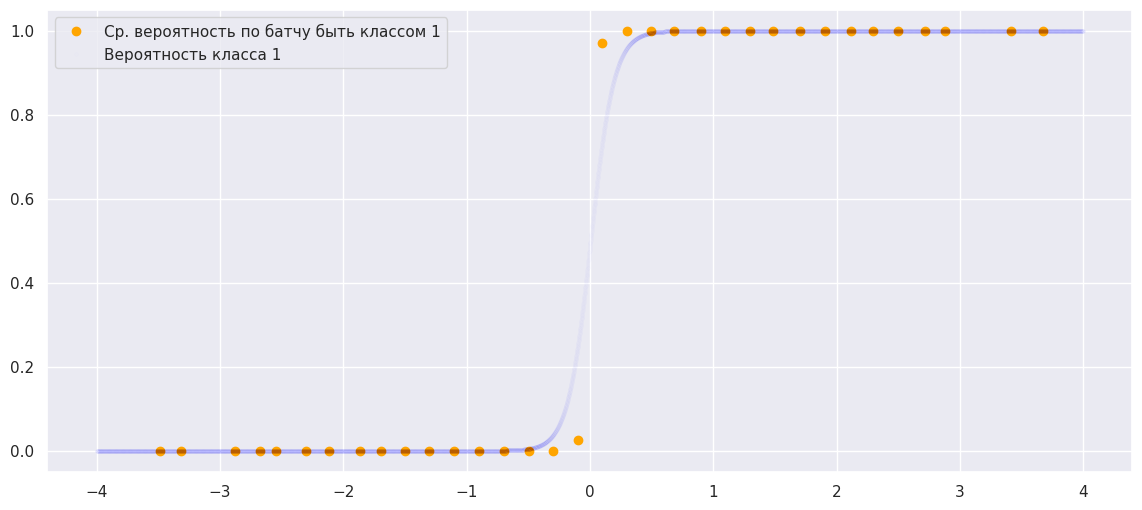

In [69]:
show_bin_distribution(X, y, logistic_model, X_grid, global_alpha=0.03)

Как и было показано на лекции регуляризация делает нашу кривую более пологой, тем самым делая границу раздела между классами более пологой. В случае бина благодаря этому кривая стала лучше повторять среднее распределенее вероятности внутри бина.

**Выводы:**
1. Мы убедились, что модель логистической регрессии действительно подходит для бинарной классификации.
2. Пронаблюдали поведение кривой распределения и обнаружили что она хорошо повторяет среднее распределение внутри бина.
3. Пронаблюдали влияние регуляризации на кривую распределения.

---
### Задача 4.

Сгенерируем данные, состоящие из двух бинарных признаков и бинарного таргета

In [70]:
probs = np.random.uniform(size=8)
probs /= probs.sum()
probs

x = np.random.choice(np.arange(8), p=probs, size=10000)
data = pd.DataFrame(
    np.unpackbits(np.array(x.reshape(-1, 1), dtype=">i8").view(np.uint8), axis=1)[
        :, -3:
    ],
    columns=["x1", "x2", "y"],
)
data.head()

,x1,x2,y
0,1,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,1,1,1


Особенность таких данных &mdash; конечное число *возможных различных* объектов. В данном случае их всего 4, по количеству всех возможных комбинаций значений признака. Соответственно, любой моделью мы можем сделать только 4 различных предсказания. Исследуем, как с этим справляется логистическая регрессия.

Сначала для сравнения посчитайте долю класса 1 для каждой категории объектов.

*Подсказка:* используйте `pivot_table`.

In [71]:
pivot = data.pivot_table(index=['x1', "x2"], values="y", aggfunc="mean").reset_index()
pivot.rename(columns={'y' : "prob_of_class"}, inplace=True)
pivot

,x1,x2,prob_of_class
0,0,0,0.421162
1,0,1,0.364496
2,1,0,0.518736
3,1,1,0.744541


Обучите логистическую регрессию и получите предсказания вероятностей для этих четырех типов объектов. Представьте результаты в таком виде, чтобы их удобно было сравнивать с частотами, посчитанными ранее. 

In [72]:
logistic_model = LogisticRegression(penalty=None, fit_intercept=True)
logistic_model.fit(data[["x1", "x2"]], data["y"])
logistic_model.coef_

array([[1.36006046, 0.7151525 ]])

Теперь рассчитаем вероятность классов при помощи модели.

In [73]:
pred_data = data[['x1', 'x2']].copy()
pred_data["pred_prob"] = logistic_model.predict_proba(data[['x1', 'x2']])[:, 1]
pred_data = pred_data.pivot_table(index=['x1', 'x2'], values='pred_prob', aggfunc='mean').reset_index()
print("Распределение в случае предсказаний")
pred_data

Распределение в случае предсказаний


,x1,x2,pred_prob
0,0,0,0.237059
1,0,1,0.388477
2,1,0,0.547652
3,1,1,0.712251


In [74]:
print("Реальное распределение")
pivot.head()

Реальное распределение


,x1,x2,prob_of_class
0,0,0,0.421162
1,0,1,0.364496
2,1,0,0.518736
3,1,1,0.744541


Почему результаты не совпадают?

Для ответа на этот вопрос распишите формулу, которая задает модель логистической регрессии, указав все параметры. Какое предположение о данных при этом делает логистическая регрессия?

Логистическая регрессия предполагает, что данные в выборке независимы, что в нашем случае может быть не так, что и вносит ошибку. 

Вероятность класса 1: $\sigma(X^T\theta) = \frac{1}{1 + e^{-X^T\theta}}$

Но заметим, что в градиенте $\nabla \log L_y(\theta) = X^T(Y-S(\theta))$ мы не учитываем веса признаков в нашей выборки, из за чего реальные предсказания могут смещаться. Разумно ввести веса в модель обучения регрессии.

Предложите и реализуйте способ обучить логистическую регрессию чтобы она точнее предсказывала частоты, посчитанные ранее.

In [75]:
logistic_model = LogisticRegression(penalty=None, fit_intercept=True, class_weight='balanced')
logistic_model.fit(data[["x1", "x2"]], data["y"])
logistic_model.coef_

array([[1.36537657, 0.72189822]])

In [76]:
pred_data = data[['x1', 'x2']].copy()
pred_data["pred_prob"] = logistic_model.predict_proba(data[['x1', 'x2']])[:, 1]
pred_data = pred_data.pivot_table(index=['x1', 'x2'], values='pred_prob', aggfunc='mean').reset_index()
print("Распределение в случае предсказаний")
pred_data

Распределение в случае предсказаний


,x1,x2,pred_prob
0,0,0,0.222296
1,0,1,0.370414
2,1,0,0.528230
3,1,1,0.697398


In [77]:
print("Реальное распределение")
pivot

Реальное распределение


,x1,x2,prob_of_class
0,0,0,0.421162
1,0,1,0.364496
2,1,0,0.518736
3,1,1,0.744541


Сделайте вывод по этой и предыдущей задачам.

Как мы видим, порой веса вносят значимую корректировку в распределению вероятностей. Впрочем, и в этом случае модель с весами порой предсказывает хуже, чем модель без них. Вероятно это связано с подстановкой неверных весов.

В прошлой задаче, благодаря равномерному одномерному распределению нам не понадобилось вводить веса из диспропорции классов.

---
### Задача 5.

**1.** Реализуйте логистическую регрессию с регуляризацией для трех вариантов поиска оценки параметров:
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск с размером батча 5-10;
* IRLS.

Для измерения времени работы **каждого** шага используйте 

`from time import time`

*Замечания.* 

1. Для чистоты эксперимента время шага внутри цикла нужно замерять от конца предыдущего шага до конца текущего, а не от начала текущего шага.
2. Иногда при подсчете сигмоиды и оптимизируемого функционала могут возникать вычислительные ошибки. Для их избежания существуют специальные трюки.
    * [How to Evaluate the Logistic Loss and not NaN trying](http://fa.bianp.net/blog/2019/evaluate_logistic/)
    * [The log-sum-exp trick in Machine Learning](https://www.xarg.org/2016/06/the-log-sum-exp-trick-in-machine-learning/)
    * [Exp-normalize trick](https://timvieira.github.io/blog/post/2014/02/11/exp-normalize-trick/)<br>
3. Трюки не обязательно реализовывать самостоятельно, можете воспользоваться функциями для них из `scipy`, `numpy`: 
    * [`scipy.special.logsumexp`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.logsumexp.html);
    * [`numpy.logaddexp`](https://numpy.org/doc/stable/reference/generated/numpy.logaddexp.html).
4. В методе IRLS можно добавить малый регуляризатор, даже если регуляризации нет, для исключения вычислительных проблем.
5. Следите за качеством кода, комментируйте логические этапы кода. Несоблюдение этого требования может привести к потере баллов.

In [78]:
from time import time

In [79]:
class CustomLogisticRegression:
    """
    Модель логистической регрессии. Имеет следующие гиперпараметры:

    :param alpha: параметр регуляризации.
                     Если равно 0, то регуляризация не происходит.
    :param lr: константа, на которую домножаем градиент при обучении
    :param eps: ограничение на норму невязки в случае
                   если используется критерий criterion='eps'
    :param max_iter: ограничение на кол-во итераций в случае
                        если используется критерий criterion='max_iter'
    :param method: если равно 'gd', то используется обычный градиентный спуск,
                   если равно 'sgd', то используется стохастический
                        градиентный спуск,
                   если равно 'irls', то используется метод IRLS.
    :param criterion: если равно 'eps', то используем ограничение
                        на норму невязки,
                      если равно 'max_iter', то используем ограничение
                        на количество итераций
    :param fit_intercept: указывает, следует ли добавить константу в признаки
    :param save_history: указывает, следует ли сохранять историю обучения
    :param batch_size: размер батча, если используется SGD
    """

    def __init__(
        self,
        alpha=0,
        lr=0.5,
        eps=1e-3,
        max_iter=1e5,
        method="gd",
        criterion="max_iter",
        fit_intercept=True,
        save_history=True,
        batch_size=1,
    ):
        """Создает модель и инициализирует параметры."""

        criterion_error_msg = "выбран неправильный критерий остановки"
        assert criterion in ["max_iter", "eps"], criterion_error_msg

        method_error_msg = "выбран неправильный метод"
        assert method in ["gd", "sgd", "irls"], method_error_msg

        self.alpha = alpha
        self.lr = lr
        self.eps = eps
        self.max_iter = max_iter
        self.criterion = criterion
        self.method = method
        self.fit_intercept = fit_intercept
        self.save_history = save_history
        self.history = {
            "iteration": [],
            "delta_time": [],
            "log(L_y)": [],
            "time": [],
        }  # для хранения истории обучения
        self.batch_size = batch_size

    def _sigmoid(self, X):
        return np.exp(self._logsig_log1pexp(X))

    def _logsig_log1pexp(self, X):
        X = X.copy()
        X[X < -33.3] = X[X < -33.3]
        mask1 = (X >= -33.3) & (X <= -18)
        mask2 = (X > -18) & (X <= 37)
        mask3 = X > 37

        X[mask1] -= np.exp(X[mask1])
        X[mask2] = -np.log1p(np.exp(-X[mask2]))
        X[mask3] = -np.exp(-X[mask3])

        return X

    def _log_likelihood(self, X: np.ndarray, y: np.ndarray):
        sigmoid_vals = self._sigmoid(X @ self.theta)
        log_L_y = y.T @ np.log(sigmoid_vals) + (1 - y).T @ np.log(1 - sigmoid_vals)

        return log_L_y.ravel()

    def _grad_log_likelihood(self, X, Y):
        S = self._sigmoid(X @ self.theta)
        return X.T @ (Y - S)

    def _grad_grad_log_likelihood(self, X, Y):
        S = self._sigmoid(X @ self.theta)
        V = np.diag((S * (1 - S)).ravel())
        return X.T @ V @ X

    def _add_intercept(self, X):
        """
        Добавляем свободный коэффициент к нашей модели.
        Это происходит путем добавления вектора из 1 к исходной матрице.

        :param X: исходная матрица признаков
        :return: матрица X с добавленным свободным коэффициентов
        """

        X_copy = np.full((X.shape[0], X.shape[1] + 1), fill_value=1)
        X_copy[:, :-1] = X

        return X_copy

    def _add_to_history(self, cur_iteration, t1_point, t2_point, X, Y):
        self.history["iteration"].append(cur_iteration)
        self.history["delta_time"].append(t2_point - t1_point)
        self.history["log(L_y)"].append(self._log_likelihood(X, Y))
        if len(self.history["time"]) == 0:
            self.history["time"].append(0)
        else:
            self.history["time"].append(
                self.history["time"][-1] - self.history["delta_time"][-1]
            )

    def _gd_fit(self, X, Y):
        cur_iteration = 0
        cur_eps = 1e10
        t1_point = time()
        t2_point = 0

        while True:
            if self.save_history and cur_iteration != 0:
                self._add_to_history(cur_iteration, t1_point, t2_point, X, Y)

            t2_point = time()
            if self.criterion == "max_iter" and cur_iteration > self.max_iter:
                break
            elif self.criterion == "eps" and cur_eps < self.eps:
                break

            grad = -self._grad_log_likelihood(X, Y) + 2 * self.alpha * self.theta
            self.theta -= 2 * self.lr * grad

            cur_iteration += 1
            cur_eps = np.linalg.norm(grad)
            print(cur_eps, end='\r')

            t1_point = time()

        return cur_iteration

    def _sgd_fit(self, X, Y):
        cur_iteration = 0
        cur_eps = 1e10
        t1_point = time()
        t2_point = 0

        while True:
            if self.save_history and cur_iteration != 0:
                self._add_to_history(cur_iteration, t1_point, t2_point, X, Y)

            t2_point = time()
            if self.criterion == "max_iter" and cur_iteration > self.max_iter:
                break
            elif self.criterion == "eps" and cur_eps < self.eps:
                break

            indices = np.random.choice(X.shape[0], self.batch_size, replace=False)
            X_batch = X[indices]
            Y_batch = Y[indices]

            grad = (
                -self._grad_log_likelihood(X_batch, Y_batch)
                + 2 * self.alpha * self.theta
            )
            self.theta -= 2 * self.lr * grad

            cur_iteration += 1
            cur_eps = np.linalg.norm(grad)

            t1_point = time()

        return cur_iteration

    def _irls_fit(self, X, Y):
        cur_iteration = 0
        cur_eps = 1e10
        t1_point = time()
        t2_point = 0

        while True:
            if self.save_history and cur_iteration != 0:
                self._add_to_history(cur_iteration, t1_point, t2_point, X, Y)

            t2_point = time()
            if self.criterion == "max_iter" and cur_iteration > self.max_iter:
                break
            elif self.criterion == "eps" and cur_eps < self.eps:
                break

            first_factor = np.linalg.inv(
                self._grad_grad_log_likelihood(X, Y)
                - 2 * (self.alpha + 0.0001) * np.eye(self.theta.shape[0])
            )
            second_factor = (
                -self._grad_log_likelihood(X, Y) + 2 * self.alpha * self.theta
            )

            grad = first_factor @ second_factor
            self.theta -= self.lr * grad

            cur_iteration += 1
            cur_eps = np.linalg.norm(grad)

            t1_point = time()

        return cur_iteration

    def fit(self, X, Y):
        """
        Обучает модель логистической регресии с помощью выбранного метода,
        пока не выполнится критерий остновки self.criterion.
        Также, в случае self.save_history=True, добавляет в self.history
        текущее значение оптимизируемого функционала
        и время обновления коэффициентов.

        :param X: матрица признаков
        :param Y: истинные метки
        """

        assert X.shape[0] == Y.shape[0]

        X_copy = self._add_intercept(X) if self.fit_intercept else X.copy()

        self.theta = np.zeros([X_copy.shape[1], 1])
        total_iteration = 0
        Y_corrected = Y.reshape(-1, 1)

        if self.method == "gd":
            total_iteration = self._gd_fit(X_copy, Y_corrected)
        elif self.method == "sgd":
            total_iteration = self._sgd_fit(X_copy, Y_corrected)
        elif self.method == "irls":
            total_iteration = self._irls_fit(X_copy, Y_corrected)

        self.coef_ = self.theta

        self.intercept_ = (
            self.theta[-1, 0] if self.fit_intercept else None
        )  # свободный коэффициент
        self.n_iter_ = total_iteration  # произведенное число итераций

        return self

    def predict(self, X):
        """
        Применяет обученную модель к данным
        и возвращает точечное предсказание (оценку класса).

        :param X: матрица признаков
        :return: предсказание с размерностью (n_test, )
        """

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.coef_.shape[0]

        predictions = np.round(self._sigmoid(X_copy @ self.theta))

        return predictions

    def predict_proba(self, X):
        """
        Применяет обученную модель к данным
        и возвращает предсказание вероятности классов 0 и 1.

        :param X: матрица признаков
        :return: вероятности предсказания с размерностью (n_test, 2)
        """

        if self.fit_intercept:
            X_copy = self._add_intercept(X)
        else:
            X_copy = X.copy()

        assert X_copy.shape[1] == self.coef_.shape[0]

        prob_predictions = self._sigmoid(X_copy @ self.theta)

        return prob_predictions

Рассмотрим игрушечный датасет на $30$ признаков `load_breast_cancer` из библиотеки `sklearn`. Это относительно простой для бинарной классификации датасет по диагностике рака молочной железы.

Ради интереса можно прочитать описание признаков.

In [80]:
dataset = load_breast_cancer()
dataset["DESCR"].split("\n")[11:31]

[':Attribute Information:',
 '    - radius (mean of distances from center to points on the perimeter)',
 '    - texture (standard deviation of gray-scale values)',
 '    - perimeter',
 '    - area',
 '    - smoothness (local variation in radius lengths)',
 '    - compactness (perimeter^2 / area - 1.0)',
 '    - concavity (severity of concave portions of the contour)',
 '    - concave points (number of concave portions of the contour)',
 '    - symmetry',
 '    - fractal dimension ("coastline approximation" - 1)',
 '',
 '    The mean, standard error, and "worst" or largest (mean of the three',
 '    worst/largest values) of these features were computed for each image,',
 '    resulting in 30 features.  For instance, field 0 is Mean Radius, field',
 '    10 is Radius SE, field 20 is Worst Radius.',
 '',
 '    - class:',
 '            - WDBC-Malignant',
 '            - WDBC-Benign']

Разделим нашу выборку на обучающую и тестовую:

In [81]:
X, Y = dataset["data"], dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 30), (114, 30), (455,), (114,))

При использовании регуляризации данные необходимо нормализовать. Воспользуемся для этого классом `StandardScaler` из библиотеки `sklearn`. 

In [82]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**2.** Теперь обучите три модели логистической регрессии без регуляризации с помощью методов
* обычный градиентный спуск;
* стохастический mini-batch градиентный спуск;
* IRLS.

Постройте график, на котором нанесите три кривые обучения, каждая из которых отображает зависимость оптимизируемого функционала от номера итерации метода. **Функционал должен быть одинаковый для всех моделей: логарифм функции правдоподобия без минусов**. Нарисуйте также график зависимости этого функционала от времени работы метода. Сделайте выводы. Что будет при обучении на датасете, в котором больше строк, а число столбцов останется прежним?

*Замечания:* 
* Все графики должны быть информативны, с подписанными осями и т.д..
* Для чистоты эксперимента желательно не запускать в момент обучения другие задачи и провести обучение несколько раз, усреднив результаты.

In [83]:
gd_logistic_model = CustomLogisticRegression(fit_intercept=True, save_history=True, max_iter=1000, lr=0.0001, method="gd")
gd_logistic_model.fit(X_train, Y_train)

In [84]:
sgd_logistic_model = CustomLogisticRegression(fit_intercept=True, save_history=True, max_iter=1000, lr=0.0001, method="sgd", batch_size=50)
sgd_logistic_model.fit(X_train, Y_train)

In [85]:
irls_logistic_model = CustomLogisticRegression(fit_intercept=True, save_history=True, max_iter=1000,  method="irls", alpha = 0.001, lr=0.005)
irls_logistic_model.fit(X_train, Y_train)

accuracy = accuracy_score(Y_train, irls_logistic_model.predict(X_train))
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 94.95%


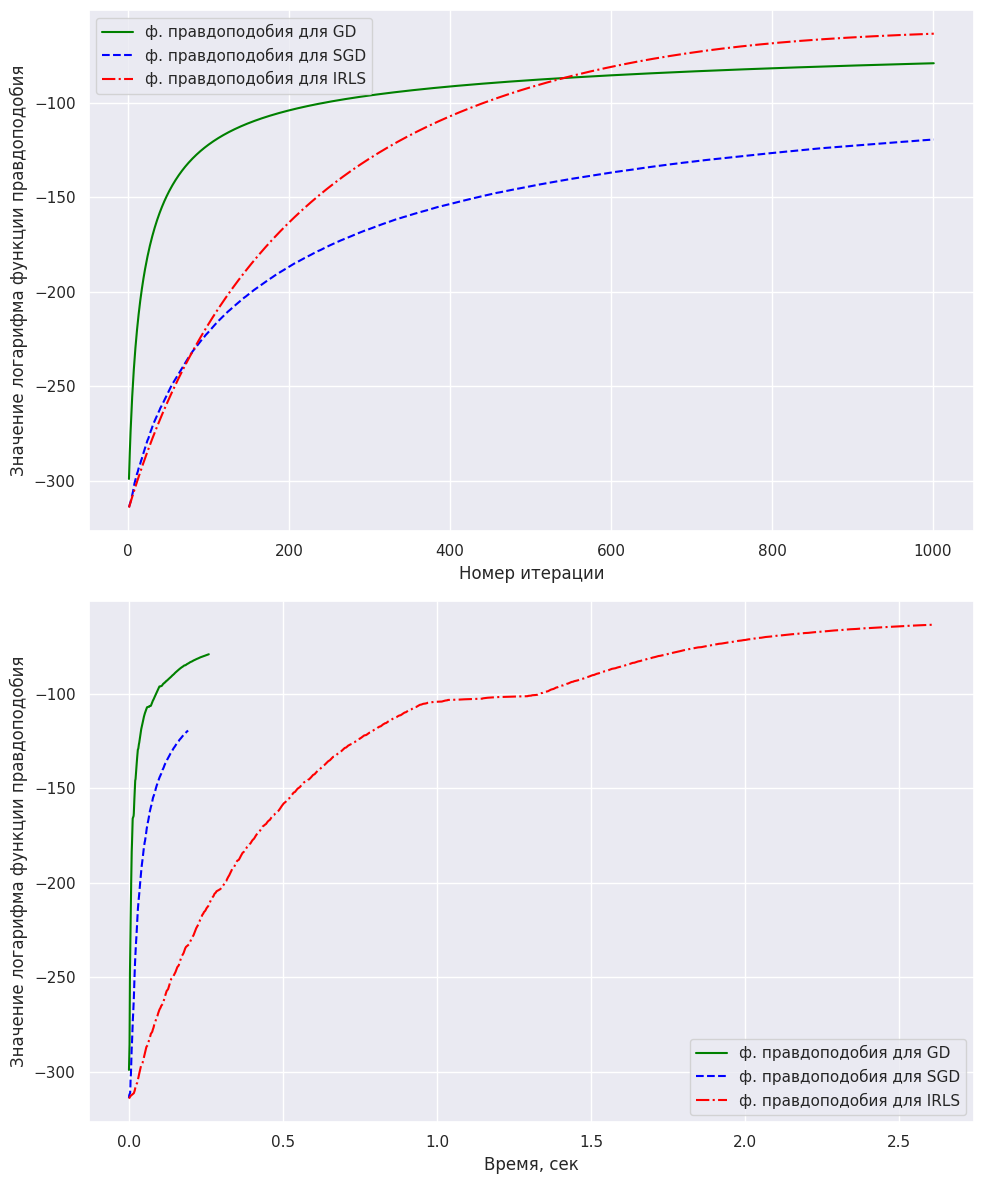

In [86]:
import matplotlib.pyplot as plt

def plot_log_likelihood(models, line_styles, labels, colors, alpha = 1):
    """
    Строит два subplot'а: один для зависимости логарифма функции правдоподобия от номера итерации,
    другой для зависимости логарифма функции правдоподобия от времени.

    :param models: массив моделей, каждая из которых имеет атрибут history с ключами "iteration", "time", "log(L_y)"
    :param line_styles: массив типов линий для каждой модели (например, "-", "--", "dashdot")
    :param labels: массив меток для каждой модели
    :param colors: массив цветов для каждой модели
    """
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

    for model, ls, label, color in zip(models, line_styles, labels, colors):
        ax1.plot(
            model.history["iteration"],
            model.history["log(L_y)"],
            marker=" ",
            ls=ls,
            label=label,
            color=color,
            alpha=alpha
        )

    ax1.set_xlabel("Номер итерации")
    ax1.set_ylabel("Значение логарифма функции правдоподобия")
    ax1.legend()

    for model, ls, label, color in zip(models, line_styles, labels, colors):
        ax2.plot(
            model.history["time"],
            model.history["log(L_y)"],
            marker=" ",
            ls=ls,
            label=label,
            color=color,
            alpha=alpha
        )

    ax2.set_xlabel("Время, сек")
    ax2.set_ylabel("Значение логарифма функции правдоподобия")
    ax2.legend()

    # ax1.set_ylim((-1000, 0))
    # ax2.set_ylim((-1000, 0))

    plt.tight_layout()
    plt.show()

models = [gd_logistic_model, sgd_logistic_model, irls_logistic_model]
line_styles = ["-", "--", "dashdot"]
labels = ["ф. правдоподобия для GD", "ф. правдоподобия для SGD", "ф. правдоподобия для IRLS"]
colors = ["green", "blue", "red"]

plot_log_likelihood(models, line_styles, labels, colors)


Ожидаемо, SGD оказался немного хуже GD. Заметим, странное поведение логарифма функции правдоподобия для метода Ньютона. Ввиду того, что он является очень быстрым, при подсчете логарифмов часто возникали экстремальные значения, это выливается в его быструю расходимость при неверных параметрах.

Если число строк увеличить, не увеличивая число столбцов, то повысится линейной зависимости между строками, что выльется в необходимость использования регуляризации.

Но тем не менее, IRLS имеет наибольший F1-score

In [87]:

irls_f1_score = f1_score(Y_test, irls_logistic_model.predict(X_test))
gd_f1_score = f1_score(Y_test, gd_logistic_model.predict(X_test))
sgd_f1_score = f1_score(Y_test, sgd_logistic_model.predict(X_test))
print("IRLS F1-score: %0.3g" % irls_f1_score)
print("GD F1-score: %0.3g" % gd_f1_score)
print("SGD F1-score: %0.3g" % sgd_f1_score)

IRLS F1-score: 0.952
GD F1-score: 0.94
SGD F1-score: 0.928


**3.** Сравните два реализованных критерия остановки по количеству проведенных итераций: 
* евклидова норма разности текущего и нового векторов весов стала меньше, чем $10^{-4}$;
* ограничение на число итераций (например, $10000$). 

Используйте градиентный спуск.

Я буду использовать eps равный $10^{-3}$ и количество итераций равное 1000, т.к. иначе общет занимает слишком долгое время. Как будет видно ниже, это радикально не изменит выводов.

In [88]:
eps_gd_logistic_model = CustomLogisticRegression(
    fit_intercept=True,
    save_history=True,
    criterion="eps",
    eps=1e-3,
    lr=0.0025,
    method="gd",
)
max_iter_gd_logistic_model = CustomLogisticRegression(
    fit_intercept=True,
    save_history=True,
    criterion="max_iter",
    max_iter=1e3,
    lr=0.0025,
    method="gd",
)

eps_gd_logistic_model.fit(X_train, Y_train)
max_iter_gd_logistic_model.fit(X_train, Y_train)

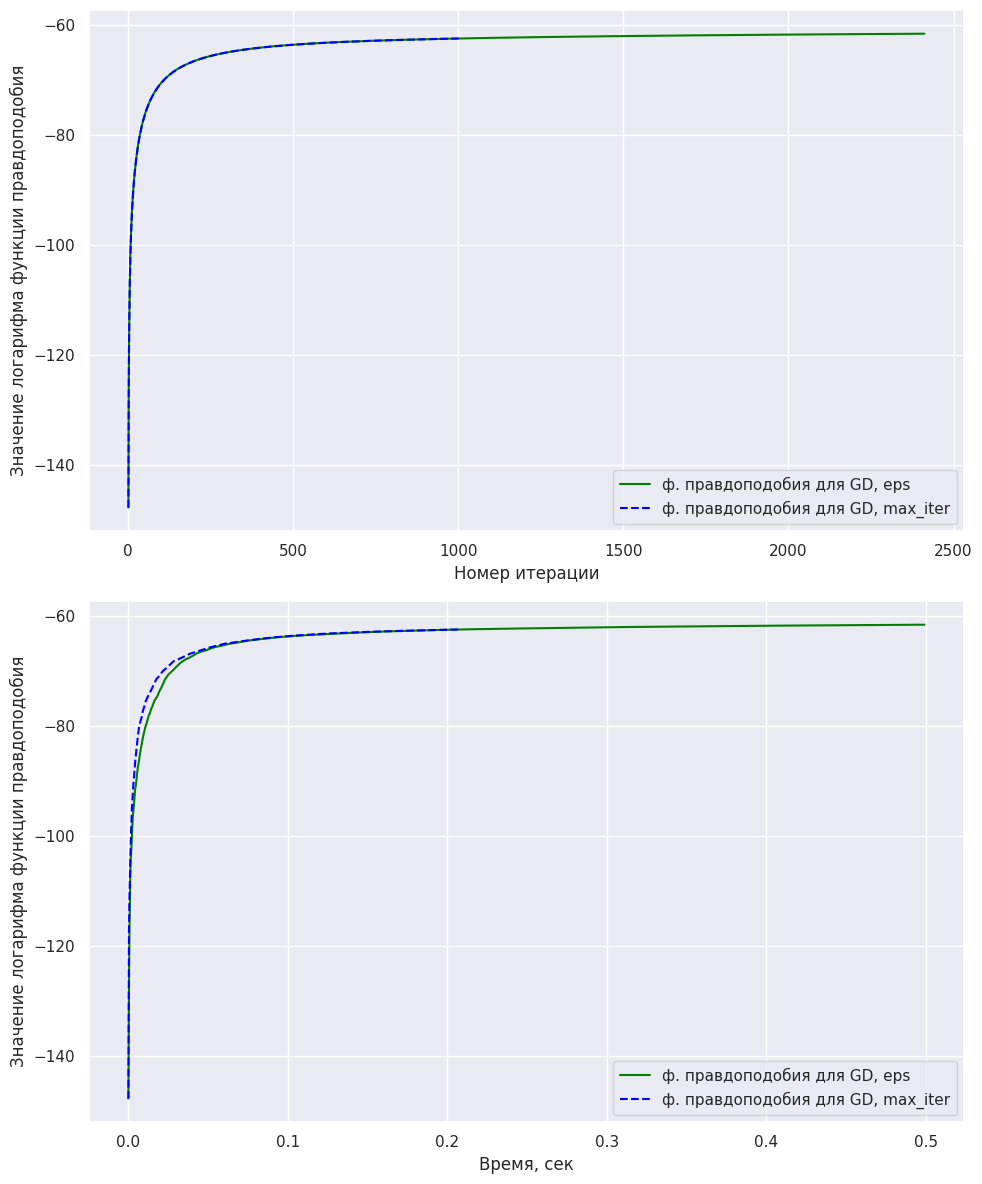

In [89]:
models = [eps_gd_logistic_model, max_iter_gd_logistic_model]
line_styles = ["-", "--"]
labels = ["ф. правдоподобия для GD, eps", "ф. правдоподобия для GD, max_iter"]
colors = ["green", "blue"]

plot_log_likelihood(models, line_styles, labels, colors)

Как видим, логарифмы функции правдоподобия для обеих моделей почти не отличаются на независимо от итерации. 

Тем не менее, модель с критерием останова евклидовой нормы проработала дольше и по времени, и по количеству итераций не увеличив логарифма функции правдоподобия.

**4.** Рассмотрите как влияет размер шага (`learning rate`) на качество модели. Обучите каждую модель одинаковое число итераций (например, 10000), а затем посчитайте качество. Воспользуйтесь ограничением на число итераций в качестве критерия остановки, так как для больших `learning rate` у вас может не сойтись модель. Используйте стохастический градиентный спуск. Сделайте выводы.

In [90]:
lrs = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2, 0.3, 0.5, 0.7, 1, 2, 5, 10]

In [91]:
models = []
for lr in lrs:
    model = CustomLogisticRegression(
        fit_intercept=True,
        save_history=True,
        criterion="max_iter",
        max_iter=125,
        lr=lr,
        method="sgd",
        batch_size=5
    )
    model.fit(X_train, Y_train)
    models.append(model)

In [92]:
for model in models:
    print("SGD with lr = %6g has F1-score:%0.3g" % (model.lr, f1_score(Y_test, model.predict(X_test))))

SGD with lr =  1e-05 has F1-score:0.9
SGD with lr = 0.0001 has F1-score:0.912
SGD with lr =  0.001 has F1-score:0.912
SGD with lr =   0.01 has F1-score:0.928
SGD with lr =    0.1 has F1-score:0.932
SGD with lr =    0.2 has F1-score:0.915
SGD with lr =    0.3 has F1-score:0.906
SGD with lr =    0.5 has F1-score:0.908
SGD with lr =    0.7 has F1-score:0.892
SGD with lr =      1 has F1-score:0.93
SGD with lr =      2 has F1-score:0.894
SGD with lr =      5 has F1-score:0.918
SGD with lr =     10 has F1-score:0.872


Как видим, при увеличении lr у нас падает F1-score, что может свидетельстовать о ухудшении качества модели. Также при больших lr модели начинают сильно расходится, что выражается в хаотичном поведении лосаа моделей.

Постройте кривые обучения для различных `learning rate`. Не обязательно рассматривать все `learning rate`, так как их слишком много, и график будет нагроможден. Возьмите около половины из них. Какой `learning rate` лучше выбрать? Чем плохи маленькие и большие `learning rate`?

In [93]:
every_second_lr = lrs[0:5]
# every_second_lr = [1e-5, 1e-4, 1e-3, 1e-2]

models = []
for lr in every_second_lr:
    model = CustomLogisticRegression(
        fit_intercept=True,
        save_history=True,
        criterion="max_iter",
        max_iter=1000,
        lr=lr,
        method="sgd",
        batch_size=5
    )
    model.fit(X_train, Y_train)
    models.append(model)

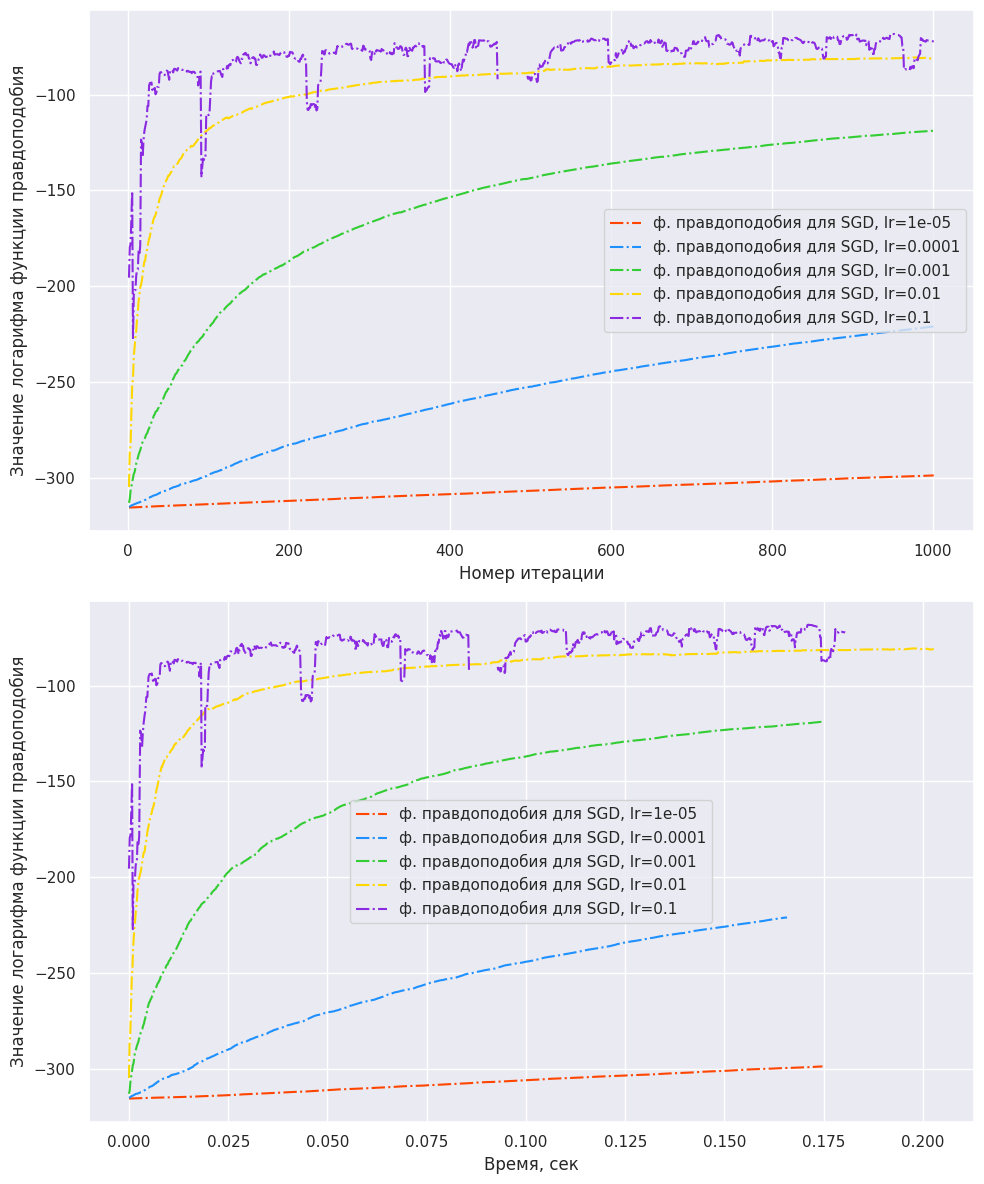

In [94]:
line_styles = ["dashdot" for i in range(len(every_second_lr))]
labels = ["ф. правдоподобия для SGD, lr=%g" % model.lr for model in models]
colors = ["#FF4500", "#1E90FF", "#32CD32", "#FFD700", "#8A2BE2"]

plot_log_likelihood(models, line_styles, labels, colors, alpha = 1)

Как видим, при увеличении lr, логарифм функции правдоподобия максимизируется, но при этом более хаотично. Если продолжать увеличивать lr функция начинает напротив расходится, что типично для градиентного спуска при большом параметре обучения.

Таким, образом всегда нужно пытаться найти наибольший параметр, при котором функция не расходится. Такой подход быстрее всего максимизирует наш лосс.

**5.** Рассмотрите несколько моделей, полученные при помощи GD, в которых установите не менее 5-ти различных коэффициентов регуляризации, а также модель без регуляризатора. Сравните, влияет ли наличие регуляризации на скорость сходимости и качество, сделайте выводы. Под качеством подразумевается значение какой-либо выбранной вами метрики качества классификации.

In [101]:
alphas = [10 ** (i - 2) for i in range(5)]

models = []
for alpha in alphas:
    model = CustomLogisticRegression(
        fit_intercept=True,
        save_history=True,
        criterion="max_iter",
        max_iter=125,
        lr=0.001,
        method="gd",
        alpha=alpha
    )
    model.fit(X_train, Y_train)
    models.append(model)


In [102]:
for model in models:
    print("GD with alpha = %4g has F1-score:%0.3g" % (model.alpha, f1_score(Y_test, model.predict(X_test))))

GD with alpha = 0.01 has F1-score:0.94
GD with alpha =  0.1 has F1-score:0.94
GD with alpha =    1 has F1-score:0.94
GD with alpha =   10 has F1-score:0.928
GD with alpha =  100 has F1-score:0.928


Как видим, F1-score ументшается с увеличением $\alpha$, что может свидельствовать, что мы могли подавить какие-то внутренние зависимости, из-за чего мы предсказательная способность модели могла ухудшиться

In [103]:
model_with_best_alpha = max(models, key=lambda model: f1_score(Y_test, model.predict(X_test)))

**6.** Возьмите лучшую модель с предыдущего шага. В исходной выборке оставьте только два произвольных признака и обучите на них модель без использования свободного параметра. Визуализируйте предсказания вероятностей класса $1$ для модели.

Возьмем первый и второй признаки для обучения.

In [104]:
best_model = CustomLogisticRegression(fit_intercept=False,
        save_history=True,
        criterion="max_iter",
        max_iter=125,
        lr=0.001,
        method="sgd",
        batch_size=5,
        alpha=model_with_best_alpha.alpha)
best_model.fit(X_train[:, [3, 4]], Y_train)

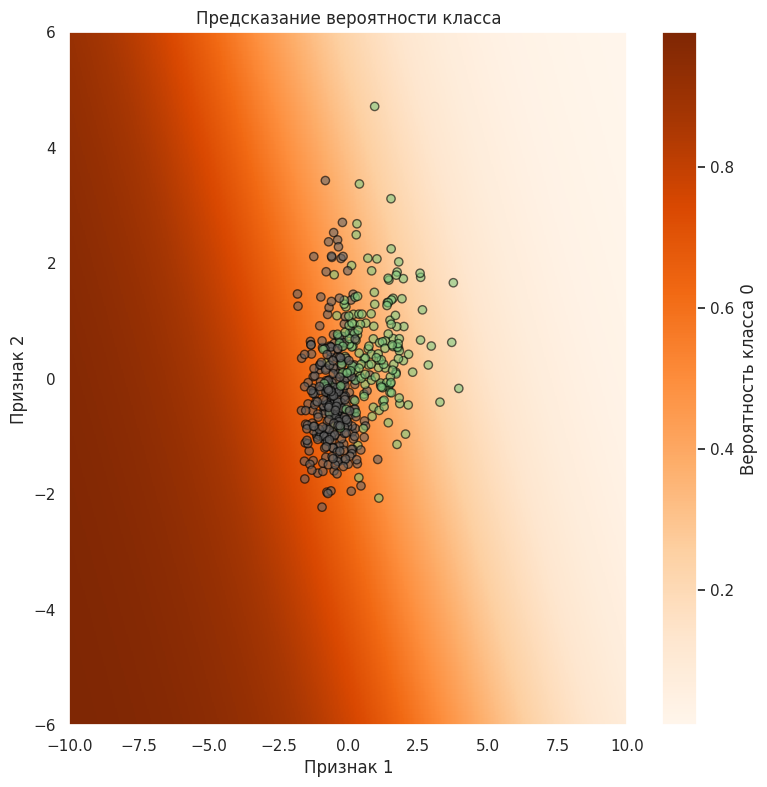

In [108]:
size = X_train.shape[0]

x0_grid, x1_grid = np.meshgrid(np.linspace(-10, 10, size), np.linspace(-6, 6, size))
ravel_grid = np.array([x0_grid, x1_grid]).reshape((2, size * size)).T
prob_grid = best_model.predict_proba(ravel_grid)
prob_grid = prob_grid[:, 0].reshape((size, size))

plt.figure(figsize=(9, 9))
prob_plot = plt.pcolormesh(x0_grid, x1_grid, prob_grid, cmap="Oranges", shading="auto")
plt.scatter(
    X_train[:, 0], X_train[:, 1], c=Y_train, alpha=0.6, cmap="Accent", edgecolors="k"
)
plt.xlim((-10, 10))
plt.ylim((-6, 6))
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Предсказание вероятности класса")

cbar = plt.colorbar(prob_plot)
cbar.set_label("Вероятность класса 1")

plt.show()

In [106]:
print(
    "accuracy: %3g, F1-score: %3g"
    % (
        accuracy_score(Y_test, best_model.predict(X_test[:, [3, 4]])),
        f1_score(Y_test, best_model.predict(X_test[:, [3, 4]])),
    )
)

accuracy: 0.868421, F1-score: 0.887218


Как видно по графику не смотря на то, что классы лежат вплотную к друг другу по выбранным признак, мы все равно смогли построить тепловую карту распределения правильных меток, хоть и не так точно, как это было на лекции.(Врочем там классы были отделимы друг от друга).

Заметим, что моедель выбила достаточно высокий F1-score, что может говорить о том, что она достаточно хорошо предсказывает правильные метки.

**Вывод:** В задаче мы:
1. Написали класс CustomLogisticRegression в котором реализовали три метода оптимизации: GD, SGD и IRLS. Попутно решили проблему с выбросами при подсчете лосса. Оценили методы по сходимости и времени работы, а также стабильности: как и ожидалось GD оказался стабильнее SGD, впрочем самым хаотичным оказался IRLS,  и обучался он дольше всех.
2. Пронаблюдали зависимость поведения лосса от изменения параметра обучения в GD: увидели, что при малых параметрах лосс максимизируется медленее, чем при больших. Обратной стороной оказалось то, что при увеличении параметра обучения падает стабильность модели, и начиная с какого-то момента модель начинает расходиться.
3. Увидели, что F1-score  с увеличением параметра регуляризации сначал растет, и достигнув максимума начинает снижаться, что согласуется с теоретическим представлением о регуляризации.